# Mudulos

In [1]:

import pandas as pd  # Manipulación y análisis de datos estructurados
from docx import Document  # Creación y edición de documentos Word
from docx.shared import Inches  # Definición de medidas en pulgadas para documentos
from docx.enum.text import WD_ALIGN_PARAGRAPH  # Alineación de párrafos en documentos
from docx.enum.table import WD_TABLE_ALIGNMENT  # Alineación de tablas en documentos
import seaborn as sns  # Visualización estadística avanzada y gráficos estéticos
import numpy as np  # Operaciones matemáticas y arrays multidimensionales
from docx.oxml.ns import qn  # Manejo de espacios de nombres XML en documentos
from docx.oxml import OxmlElement
from datetime import datetime  # Manejo de fechas y tiempo
import io  # Operaciones de entrada/salida de datos en memoria
from plotly.subplots import make_subplots
import calendar # Funciones relacionadas con calendarios
from docx.shared import Inches, RGBColor # Medidas y colores RGB para documentos

import matplotlib.pyplot as plt  # Creación de gráficos y visualizaciones
import plotly.express as px  # Gráficos interactivos modernos y elegantes
import plotly.graph_objects as go  # Gráficos personalizados de alta calidad
from matplotlib import style  # Estilos predefinidos para matplotlib
import warnings  # Control de advertencias del sistema
warnings.filterwarnings('ignore')  # Suprimir advertencias para output limpio
import os # Interacción con el sistema operativo
import glob  # Manejo de rutas y archivos del sistema operativo


# 1. Definición de la paleta institucional (Rojo y Verde)
# Es una lista de códigos hexadecimales.
PALETA_EPS = ['#C23034', '#289452']

# Si necesitas más de dos colores, puedes generar tonos intermedios o añadir
# un color secundario si la EPS lo tuviera. Por simplicidad, usamos los 2 principales:
# PALETA_EPS = ['#C23034', '#289452', '#D35457', '#42A862'] 

# 2. Aplicar el estilo de Seaborn para un aspecto limpio (usa el Negro/Blanco)
sns.set_style("whitegrid")  # Fondo blanco con rejilla gris

# 3. Sobreescribir la paleta por defecto con la paleta institucional
sns.set_palette(PALETA_EPS) 

# Rutas y varaibles

In [2]:
# Definir la fecha de trabajo
fecha_trabajo = "01/10/2025"  # Formato dd/mm/yyyy

#Rutas
R_Documento = r"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #11\ACTIVIDAD 14\Informe Glosas\FO-GD-07 INFORME.docx"
R_Ms = r"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\MS\MS Negado\All_MS_NEG.TXT"
R_s3 = r"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\S3\All-S3.txt"
R_Glosa_eh = r"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Constantes\glosas_error_humano.txt"
R_glosas = r"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Constantes\Glosas ADRES 2025.xlsx"
R_Expedientes_SIE = r"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\SIE\Aseguramiento\Expedientes\Años"
R_Municipios = r"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Constantes\Departamentos.txt"
R_Salida = r"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #11\ACTIVIDAD 14\Informe Glosas"

# Cargue Dataframes

In [3]:
df_ms = pd.read_csv(R_Ms, sep=',', encoding='ansi', dtype=str)
df_s3 = pd.read_csv(R_s3, sep=',', encoding='ansi', dtype=str)
df_glosa_eh = pd.read_csv(R_Glosa_eh, sep=';', encoding='ansi', dtype=str)
df_Municipios = pd.read_csv(R_Municipios, sep=';', encoding='UTF-8', dtype=str)
df_glosas = pd.read_excel(R_glosas, sheet_name='Glosas de Negocio_BDUA')

In [4]:
# Lista para almacenar todos los dataframes
dataframes_list = []

# Obtener todos los archivos .txt de la ruta
archivos_txt = glob.glob(os.path.join(R_Expedientes_SIE, "*.txt"))

# Leer cada archivo y agregarlo a la lista
for archivo in archivos_txt:
    try:
        df_temp = pd.read_csv(archivo, sep='|', encoding='ansi', dtype=str)
        dataframes_list.append(df_temp)
        print(f"Archivo cargado: {os.path.basename(archivo)}")
    except Exception as e:
        print(f"Error al cargar {archivo}: {e}")

# Concatenar todos los dataframes en uno solo
if dataframes_list:
    df_expedientes = pd.concat(dataframes_list, ignore_index=True)
    print(f"\nDataframe consolidado creado con {len(df_expedientes)} filas")
    print(f"Columnas: {list(df_expedientes.columns)}")
else:
    print("No se encontraron archivos o no se pudieron cargar")

Archivo cargado: 2022.txt
Archivo cargado: 2023.txt
Archivo cargado: 2023.txt
Archivo cargado: 2024.txt
Archivo cargado: 2024.txt
Archivo cargado: 2025-11-13.txt

Dataframe consolidado creado con 358900 filas
Columnas: ['Proceso', 'Tipo', 'Expediente', 'Tipo Documento', 'Número Identificación', 'Nombre Afiliado', 'Fecha de Nacimiento', 'Departamento', 'Municipio', 'Estado Expediente', 'Régimen Expediente', 'Fecha Grabado', 'Usuario Grabado', 'Fecha Cierre', 'Usuario Cierre', 'Carta Derechos', 'NS Automática', 'Tipo Ingreso', 'EPS Procedencia', 'Causal Anulación', 'Motivo Anulación', 'Usuario Anula', 'Fecha Anula', 'Unnamed: 23']
Archivo cargado: 2025-11-13.txt

Dataframe consolidado creado con 358900 filas
Columnas: ['Proceso', 'Tipo', 'Expediente', 'Tipo Documento', 'Número Identificación', 'Nombre Afiliado', 'Fecha de Nacimiento', 'Departamento', 'Municipio', 'Estado Expediente', 'Régimen Expediente', 'Fecha Grabado', 'Usuario Grabado', 'Fecha Cierre', 'Usuario Cierre', 'Carta Derech

# Limpieza general de datos

## Expedientes

In [5]:
# Mostrar las categorías únicas de la columna 'Proceso' en df_expedientes
print("Categorías únicas en df_expedientes['Proceso']:")
print("=" * 50)

categorias_proceso = df_expedientes['Proceso'].value_counts().sort_values(ascending=False)
print(categorias_proceso)

print(f"\nTotal de categorías únicas: {len(categorias_proceso)}")
print(f"Total de registros: {len(df_expedientes)}")

Categorías únicas en df_expedientes['Proceso']:
Proceso
Ingreso Afiliado Contributivo Cotizante               115872
Movilidad RS                                           64695
Afiliación por Adición Relación Laboral                45920
Fin Relación Laboral                                   31810
Afiliación Régimen Subsidiado Cabeza de Familia        19601
Ingreso Aportantes                                     14939
Actualización RS Definición Poblacional                12746
Actualización Municipio                                 9471
Afiliación Régimen Subsidiado Beneficiario              7192
Actualización Identificación                            5002
Afiliación Régimen Subsidiado Nacimiento                4839
Actualización Datos Contacto                            4454
Retiro de la Entidad                                    3593
N32: Grupo Familiar RS                                  2533
N36 Beneficiario a Cabeza de familia                    2362
Actualización Apellidos      

In [6]:
# Filtrar df_expedientes para mantener solo las categorías específicas de procesos
categorias_permitidas = [
    "Afiliación Régimen Subsidiado Cabeza de Familia", 
    "Afiliación Régimen Subsidiado Beneficiario", 
    "Afiliación Régimen Subsidiado Nacimiento", 
    "Ingreso Afiliado Contributivo Nacimiento"
]

df_expedientes = df_expedientes[df_expedientes['Proceso'].isin(categorias_permitidas)]

print(f"Registros después del filtro por categorías de proceso: {len(df_expedientes)}")
print(f"Categorías únicas restantes: {df_expedientes['Proceso'].unique()}")
print(f"\nConteo por categoría:")
print(df_expedientes['Proceso'].value_counts())

Registros después del filtro por categorías de proceso: 32296
Categorías únicas restantes: ['Afiliación Régimen Subsidiado Nacimiento'
 'Afiliación Régimen Subsidiado Cabeza de Familia'
 'Ingreso Afiliado Contributivo Nacimiento'
 'Afiliación Régimen Subsidiado Beneficiario']

Conteo por categoría:
Proceso
Afiliación Régimen Subsidiado Cabeza de Familia    19601
Afiliación Régimen Subsidiado Beneficiario          7192
Afiliación Régimen Subsidiado Nacimiento            4839
Ingreso Afiliado Contributivo Nacimiento             664
Name: count, dtype: int64


In [7]:
# Convertir la columna 'Fecha Grabado' a datetime
df_expedientes['Fecha_Grabado_dt'] = pd.to_datetime(df_expedientes['Fecha Grabado'], format='%Y/%m/%d %H:%M', errors='coerce')

# Ordenar por fecha de grabado (más reciente primero)
df_expedientes = df_expedientes.sort_values('Fecha_Grabado_dt', ascending=False)

# Eliminar duplicados manteniendo el primer registro (más reciente) para cada combinación de Tipo Documento y Número Identificación
df_expedientes = df_expedientes.drop_duplicates(subset=['Tipo Documento', 'Número Identificación'], keep='first')

print(f"Registros después de eliminar duplicados: {len(df_expedientes)}")
print(f"Registros con fecha de grabado válida: {df_expedientes['Fecha_Grabado_dt'].notna().sum()}")

Registros después de eliminar duplicados: 27241
Registros con fecha de grabado válida: 27241

Registros con fecha de grabado válida: 27241


## Listado de Glosas

In [8]:
# Limpiar el dataframe df_glosas eliminando registros vacíos y seleccionando solo las columnas necesarias

# Paso 1: Mostrar el estado inicial del dataframe
print("Estado inicial de df_glosas:")
print(f"Total de filas: {len(df_glosas)}")
print(f"Valores nulos en columna 'Glosa ': {df_glosas['Glosa '].isna().sum()}")
print(f"Columnas actuales: {list(df_glosas.columns)}")

# Paso 2: Eliminar filas donde la columna 'Glosa ' esté vacía (NaN)
df_glosas = df_glosas.dropna(subset=['Glosa '])

print(f"\nDespués de eliminar registros con 'Glosa ' vacía:")
print(f"Total de filas: {len(df_glosas)}")

# Paso 3: Seleccionar solo las columnas 'Glosa ' y 'Descripción'
df_glosas = df_glosas[['Glosa ', 'Descripción']]

# Paso 4: Renombrar la columna 'Glosa ' a 'Glosa' para corregir el error tipográfico
df_glosas = df_glosas.rename(columns={'Glosa ': 'Glosa'})

# Eliminar espacios en blanco al inicio y al final de la columna 'Glosa'
df_glosas['Glosa'] = df_glosas['Glosa'].str.strip()

print(f"\nDespués de seleccionar columnas y corregir nombres:")
print(f"Columnas finales: {list(df_glosas.columns)}")
print(f"Forma del dataframe: {df_glosas.shape}")

# Paso 5: Mostrar una muestra del dataframe limpio
print(f"\nPrimeras 5 filas del dataframe limpio:")
print(df_glosas.head())

# Paso 6: Verificar que no hay valores nulos en las columnas finales
print(f"\nVerificación de valores nulos:")
print(f"Valores nulos en 'Glosa': {df_glosas['Glosa'].isna().sum()}")
print(f"Valores nulos en 'Descripción': {df_glosas['Descripción'].isna().sum()}")

Estado inicial de df_glosas:
Total de filas: 352
Valores nulos en columna 'Glosa ': 144
Columnas actuales: ['Glosa ', 'Descripción', 'Tipo Archivo', 'Estructura', 'Especificación', 'Observación ']

Después de eliminar registros con 'Glosa ' vacía:
Total de filas: 208

Después de seleccionar columnas y corregir nombres:
Columnas finales: ['Glosa', 'Descripción']
Forma del dataframe: (208, 2)

Primeras 5 filas del dataframe limpio:
    Glosa                                        Descripción
0  GN0001  El número de identificación del Aportante no e...
1  GN0003  Tipo y número de identificación del afiliado r...
7  GN0004  Tipo y número de identificación del Aportante ...
8  GN0005    Tipo de identificación del Aportante no valido.
9  GN0006                Aportante ya registrado en la BDUA.

Verificación de valores nulos:
Valores nulos en 'Glosa': 0
Valores nulos en 'Descripción': 0


In [9]:
print(df_glosas.columns)

Index(['Glosa', 'Descripción'], dtype='object')


## MS depurar periodo

In [10]:
# Convertir la fecha de trabajo a datetime para extraer mes y año
fecha_trabajo_dt = pd.to_datetime(fecha_trabajo, format='%d/%m/%Y')
mes_trabajo = fecha_trabajo_dt.month
año_trabajo = fecha_trabajo_dt.year

# Convertir la columna Fecha_Proceso a datetime
df_ms['Fecha_Proceso_dt'] = pd.to_datetime(df_ms['Fecha_Proceso'], format='%d/%m/%Y')

# Filtrar el dataframe por mes y año
df_ms = df_ms[(df_ms['Fecha_Proceso_dt'].dt.month == mes_trabajo) & 
                       (df_ms['Fecha_Proceso_dt'].dt.year == año_trabajo)]

print(f"Registros originales: {len(df_ms)}")
print(f"Registros filtrados para {mes_trabajo}/{año_trabajo}: {len(df_ms)}")

Registros originales: 50
Registros filtrados para 10/2025: 50


In [11]:
import re

# Crear función para extraer el número de glosas
def contar_glosas(glosa_text):
    if pd.isna(glosa_text):
        return 0
    return glosa_text.count('GN')

# Crear función para extraer la glosa principal (primera glosa)
def extraer_glosa_principal(glosa_text):
    if pd.isna(glosa_text):
        return None
    # Buscar el primer patrón GN seguido de 4 dígitos
    match = re.search(r'GN\d{4}', glosa_text)
    return match.group() if match else None

# Aplicar las funciones al dataframe df_ms
df_ms['No_Glosas_Calculado'] = df_ms['GLOSA'].apply(contar_glosas)
df_ms['Glosa_Principal'] = df_ms['GLOSA'].apply(extraer_glosa_principal).str.strip()

# Mostrar algunas filas para verificar
print("Verificación de las nuevas columnas:")
print(df_ms[['GLOSA', 'No_Glosas', 'No_Glosas_Calculado', 'Glosa_Principal']].head(10))

# Comparar el conteo calculado con el existente
print(f"\n¿Coinciden los conteos? {(df_ms['No_Glosas'].astype(int) == df_ms['No_Glosas_Calculado']).all()}")

Verificación de las nuevas columnas:
                                                   GLOSA No_Glosas  \
22391  GN0013(RC|1118583560|MARIN|CACHAY|MILEIDY|XIOM...         1   
22392                                 GN0258(2|B03|A04);         1   
22393    GN0169(|SEGUNDO APELLIDO|MONTA¥EZ|MONTA?EZ|||);         1   
22394                                 GN0258(2|A04|A02);         1   
22395        GN0169(|SEGUNDO APELLIDO|PATI¥O|PATI?O|||);         1   
22396                                 GN0258(2|B03|A03);         1   
22397  GN0169(PRIMER APELLIDO|PAREDES|ACOSTA|SEGUNDO ...         1   
22398                                 GN0258(2|B01|A02);         1   
22399                                 GN0258(2|A03|A02);         1   
22400  GN0013(RC|1057872617|GARCIA|CACHAY|ORLEY||C|ES...         1   

       No_Glosas_Calculado Glosa_Principal  
22391                    1          GN0013  
22392                    1          GN0258  
22393                    1          GN0169  
22394       

In [12]:
# Hacer merge para agregar el nombre del municipio
df_ms = df_ms.merge(
    df_Municipios[['CODIGO', 'Nombre Municipio']], 
    left_on='MNC_ID', 
    right_on='CODIGO', 
    how='left'
)

# Eliminar la columna CODIGO duplicada si no la necesitas
df_ms = df_ms.drop('CODIGO', axis=1)

print(f"Columnas después del merge: {list(df_ms.columns)}")
print(f"Nuevas columnas agregadas: Nombre Municipio")
print(f"Registros con municipio encontrado: {df_ms['Nombre Municipio'].notna().sum()}")
print(f"Registros sin municipio: {df_ms['Nombre Municipio'].isna().sum()}")

Columnas después del merge: ['Nombre_Archivo', 'ENT_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO', 'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE', 'AFL_FECHA_NACIMIENTO', 'TPS_GNR_ID', 'MNC_ID', 'ZNS_ID', 'CND_AFL_FECHA_INICIO', 'TPS_GRP_PBL_ID', 'TPS_NVL_SSB_ID', 'CND_AFL_SBS_METODOLOGIA', 'CND_AFL_SBS_SUBGRUPO_SIV', 'TPS_IDN_CF_ID', 'HST_IDN_NUMERO_CF_IDENTIFICACION', 'TPS_PRN_ID', 'TPS_AFL_ID', 'TP_ETNIA', 'No_Glosas', 'Fecha_Proceso', 'GLOSA', 'Fecha_Proceso_dt', 'No_Glosas_Calculado', 'Glosa_Principal', 'Nombre Municipio']
Nuevas columnas agregadas: Nombre Municipio
Registros con municipio encontrado: 50
Registros sin municipio: 0


In [13]:
# Hacer merge entre df_ms y df_expedientes para traer la columna 'Usuario Grabado'
df_ms = df_ms.merge(
    df_expedientes[['Tipo Documento', 'Número Identificación', 'Usuario Grabado']], 
    left_on=['TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION'], 
    right_on=['Tipo Documento', 'Número Identificación'], 
    how='left'
)

# Eliminar las columnas duplicadas del merge
df_ms = df_ms.drop(['Tipo Documento', 'Número Identificación'], axis=1)

print(f"Columnas después del merge: {list(df_ms.columns)}")
print(f"Nueva columna agregada: Usuario Grabado")
print(f"Registros con Usuario Grabado encontrado: {df_ms['Usuario Grabado'].notna().sum()}")
print(f"Registros sin Usuario Grabado: {df_ms['Usuario Grabado'].isna().sum()}")

Columnas después del merge: ['Nombre_Archivo', 'ENT_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO', 'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE', 'AFL_FECHA_NACIMIENTO', 'TPS_GNR_ID', 'MNC_ID', 'ZNS_ID', 'CND_AFL_FECHA_INICIO', 'TPS_GRP_PBL_ID', 'TPS_NVL_SSB_ID', 'CND_AFL_SBS_METODOLOGIA', 'CND_AFL_SBS_SUBGRUPO_SIV', 'TPS_IDN_CF_ID', 'HST_IDN_NUMERO_CF_IDENTIFICACION', 'TPS_PRN_ID', 'TPS_AFL_ID', 'TP_ETNIA', 'No_Glosas', 'Fecha_Proceso', 'GLOSA', 'Fecha_Proceso_dt', 'No_Glosas_Calculado', 'Glosa_Principal', 'Nombre Municipio', 'Usuario Grabado']
Nueva columna agregada: Usuario Grabado
Registros con Usuario Grabado encontrado: 50
Registros sin Usuario Grabado: 0


In [14]:
# Hacer merge para agregar la descripción de las glosas
df_ms = df_ms.merge(
    df_glosa_eh[['Codigo', 'Descripcion']], 
    left_on='Glosa_Principal', 
    right_on='Codigo', 
    how='left'
)

# Renombrar la columna Descripcion a Descripcion_Glosa
df_ms = df_ms.rename(columns={'Descripcion': 'Descripcion_Glosa'})

# Eliminar la columna Codigo duplicada del merge
df_ms = df_ms.drop('Codigo', axis=1)

print(f"Columnas después del merge: {list(df_ms.columns)}")
print(f"Nueva columna agregada: Descripcion_Glosa")
print(f"Registros con descripción encontrada: {df_ms['Descripcion_Glosa'].notna().sum()}")
print(f"Registros sin descripción: {df_ms['Descripcion_Glosa'].isna().sum()}")

# Verificar algunas filas para confirmar el resultado
print("\nVerificación de las primeras 5 filas:")
print(df_ms[['Glosa_Principal', 'Descripcion_Glosa']].head())

Columnas después del merge: ['Nombre_Archivo', 'ENT_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO', 'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE', 'AFL_FECHA_NACIMIENTO', 'TPS_GNR_ID', 'MNC_ID', 'ZNS_ID', 'CND_AFL_FECHA_INICIO', 'TPS_GRP_PBL_ID', 'TPS_NVL_SSB_ID', 'CND_AFL_SBS_METODOLOGIA', 'CND_AFL_SBS_SUBGRUPO_SIV', 'TPS_IDN_CF_ID', 'HST_IDN_NUMERO_CF_IDENTIFICACION', 'TPS_PRN_ID', 'TPS_AFL_ID', 'TP_ETNIA', 'No_Glosas', 'Fecha_Proceso', 'GLOSA', 'Fecha_Proceso_dt', 'No_Glosas_Calculado', 'Glosa_Principal', 'Nombre Municipio', 'Usuario Grabado', 'Descripcion_Glosa']
Nueva columna agregada: Descripcion_Glosa
Registros con descripción encontrada: 50
Registros sin descripción: 0

Verificación de las primeras 5 filas:
  Glosa_Principal                                  Descripcion_Glosa
0          GN0013  Se Afiliado ya existe en la BDUA, generando du...
1          GN0258  La información digitada no coincide con la reg...
2          GN0169  La

## S3 depurar periodo

In [15]:
# Convertir la fecha de trabajo a datetime para extraer mes y año
fecha_trabajo_dt = pd.to_datetime(fecha_trabajo, format='%d/%m/%Y')
mes_trabajo = fecha_trabajo_dt.month
año_trabajo = fecha_trabajo_dt.year

# Convertir la columna Fecha_Proceso a datetime
df_s3['Fecha_Proceso_dt'] = pd.to_datetime(df_s3['Fecha_Proceso'], format='%d/%m/%Y')

# Filtrar el dataframe por mes y año
df_s3 = df_s3[(df_s3['Fecha_Proceso_dt'].dt.month == mes_trabajo) & 
                       (df_s3['Fecha_Proceso_dt'].dt.year == año_trabajo)]

print(f"Registros originales: {len(df_s3)}")
print(f"Registros filtrados para {mes_trabajo}/{año_trabajo}: {len(df_s3)}")

Registros originales: 760
Registros filtrados para 10/2025: 760

Registros filtrados para 10/2025: 760


In [16]:
# Filtrar df_s3 para mantener solo registros con TIPO_TRASLADO igual a 0, 1 o 2
df_s3 = df_s3[df_s3['TIPO_TRASLADO'].isin(['0', '1', '2'])]

print(f"Registros después del filtro por TIPO_TRASLADO (0, 1, 2): {len(df_s3)}")
print(f"Valores únicos en TIPO_TRASLADO: {df_s3['TIPO_TRASLADO'].unique()}")

Registros después del filtro por TIPO_TRASLADO (0, 1, 2): 251
Valores únicos en TIPO_TRASLADO: ['2' '0' '1']

Valores únicos en TIPO_TRASLADO: ['2' '0' '1']


In [17]:
# Aplicar las funciones para extraer glosas al dataframe df_s3
df_s3['No_Glosas_Calculado'] = df_s3['GLOSA'].apply(contar_glosas)
df_s3['Glosa_Principal'] = df_s3['GLOSA'].apply(extraer_glosa_principal).str.strip()

# Hacer merge para agregar el nombre del municipio
df_s3 = df_s3.merge(
    df_Municipios[['CODIGO', 'Nombre Municipio']], 
    left_on='MNC_ID', 
    right_on='CODIGO', 
    how='left'
).drop('CODIGO', axis=1)

# Hacer merge para traer la columna 'Usuario Grabado'
df_s3 = df_s3.merge(
    df_expedientes[['Tipo Documento', 'Número Identificación', 'Usuario Grabado']], 
    left_on=['TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION'], 
    right_on=['Tipo Documento', 'Número Identificación'], 
    how='left'
).drop(['Tipo Documento', 'Número Identificación'], axis=1)

# Hacer merge para agregar la descripción de las glosas
df_s3 = df_s3.merge(
    df_glosa_eh[['Codigo', 'Descripcion']], 
    left_on='Glosa_Principal', 
    right_on='Codigo', 
    how='left'
).rename(columns={'Descripcion': 'Descripcion_Glosa'}).drop('Codigo', axis=1)

print("--- Procesamiento de df_s3 completado ---")
print(f"Columnas finales: {list(df_s3.columns)}")
print(f"Registros con municipio: {df_s3['Nombre Municipio'].notna().sum()}")
print(f"Registros con Usuario Grabado: {df_s3['Usuario Grabado'].notna().sum()}")
print(f"Registros con descripción de glosa: {df_s3['Descripcion_Glosa'].notna().sum()}")
print("\nVerificación de las primeras 5 filas:")
print(df_s3[['Glosa_Principal', 'Nombre Municipio', 'Usuario Grabado', 'Descripcion_Glosa']].head())

--- Procesamiento de df_s3 completado ---
Columnas finales: ['Nombre_Archivo', 'ENT_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO', 'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE', 'AFL_FECHA_NACIMIENTO', 'TPS_GNR_ID', 'TPS_IDN_ID_2', 'HST_IDN_NUMERO_IDENTIFICACION_2', 'AFL_PRIMER_APELLIDO_2', 'AFL_SEGUNDO_APELLIDO_2', 'AFL_PRIMER_NOMBRE_2', 'AFL_SEGUNDO_NOMBRE_2', 'AFL_FECHA_NACIMIENTO_2', 'TPS_GNR_ID_2', 'MNC_ID', 'ZNS_ID', 'FECHA_AFILIACION_MOVILIDAD', 'TPS_GRP_PBL_ID', 'TPS_NVL_SSB_ID', 'TIPO_TRASLADO', 'CND_AFL_SBS_METODOLOGIA', 'CND_AFL_SBS_SUBGRUPO_SIV', 'CON_DISCAPACIDAD', 'TPS_IDN_CF_ID', 'HST_IDN_NUMERO_CF_IDENTIFICACION', 'TPS_PRN_ID', 'TPS_AFL_ID', 'TPS_MDL_SBS_ID', 'ENT_ID_ORIGEN', 'GLOSA', 'Fecha_Proceso', 'No_Glosas', 'Fecha_Proceso_dt', 'No_Glosas_Calculado', 'Glosa_Principal', 'Nombre Municipio', 'Usuario Grabado', 'Descripcion_Glosa']
Registros con municipio: 251
Registros con Usuario Grabado: 250
Registros con descripción 

# Informe MS

## dashboard MS

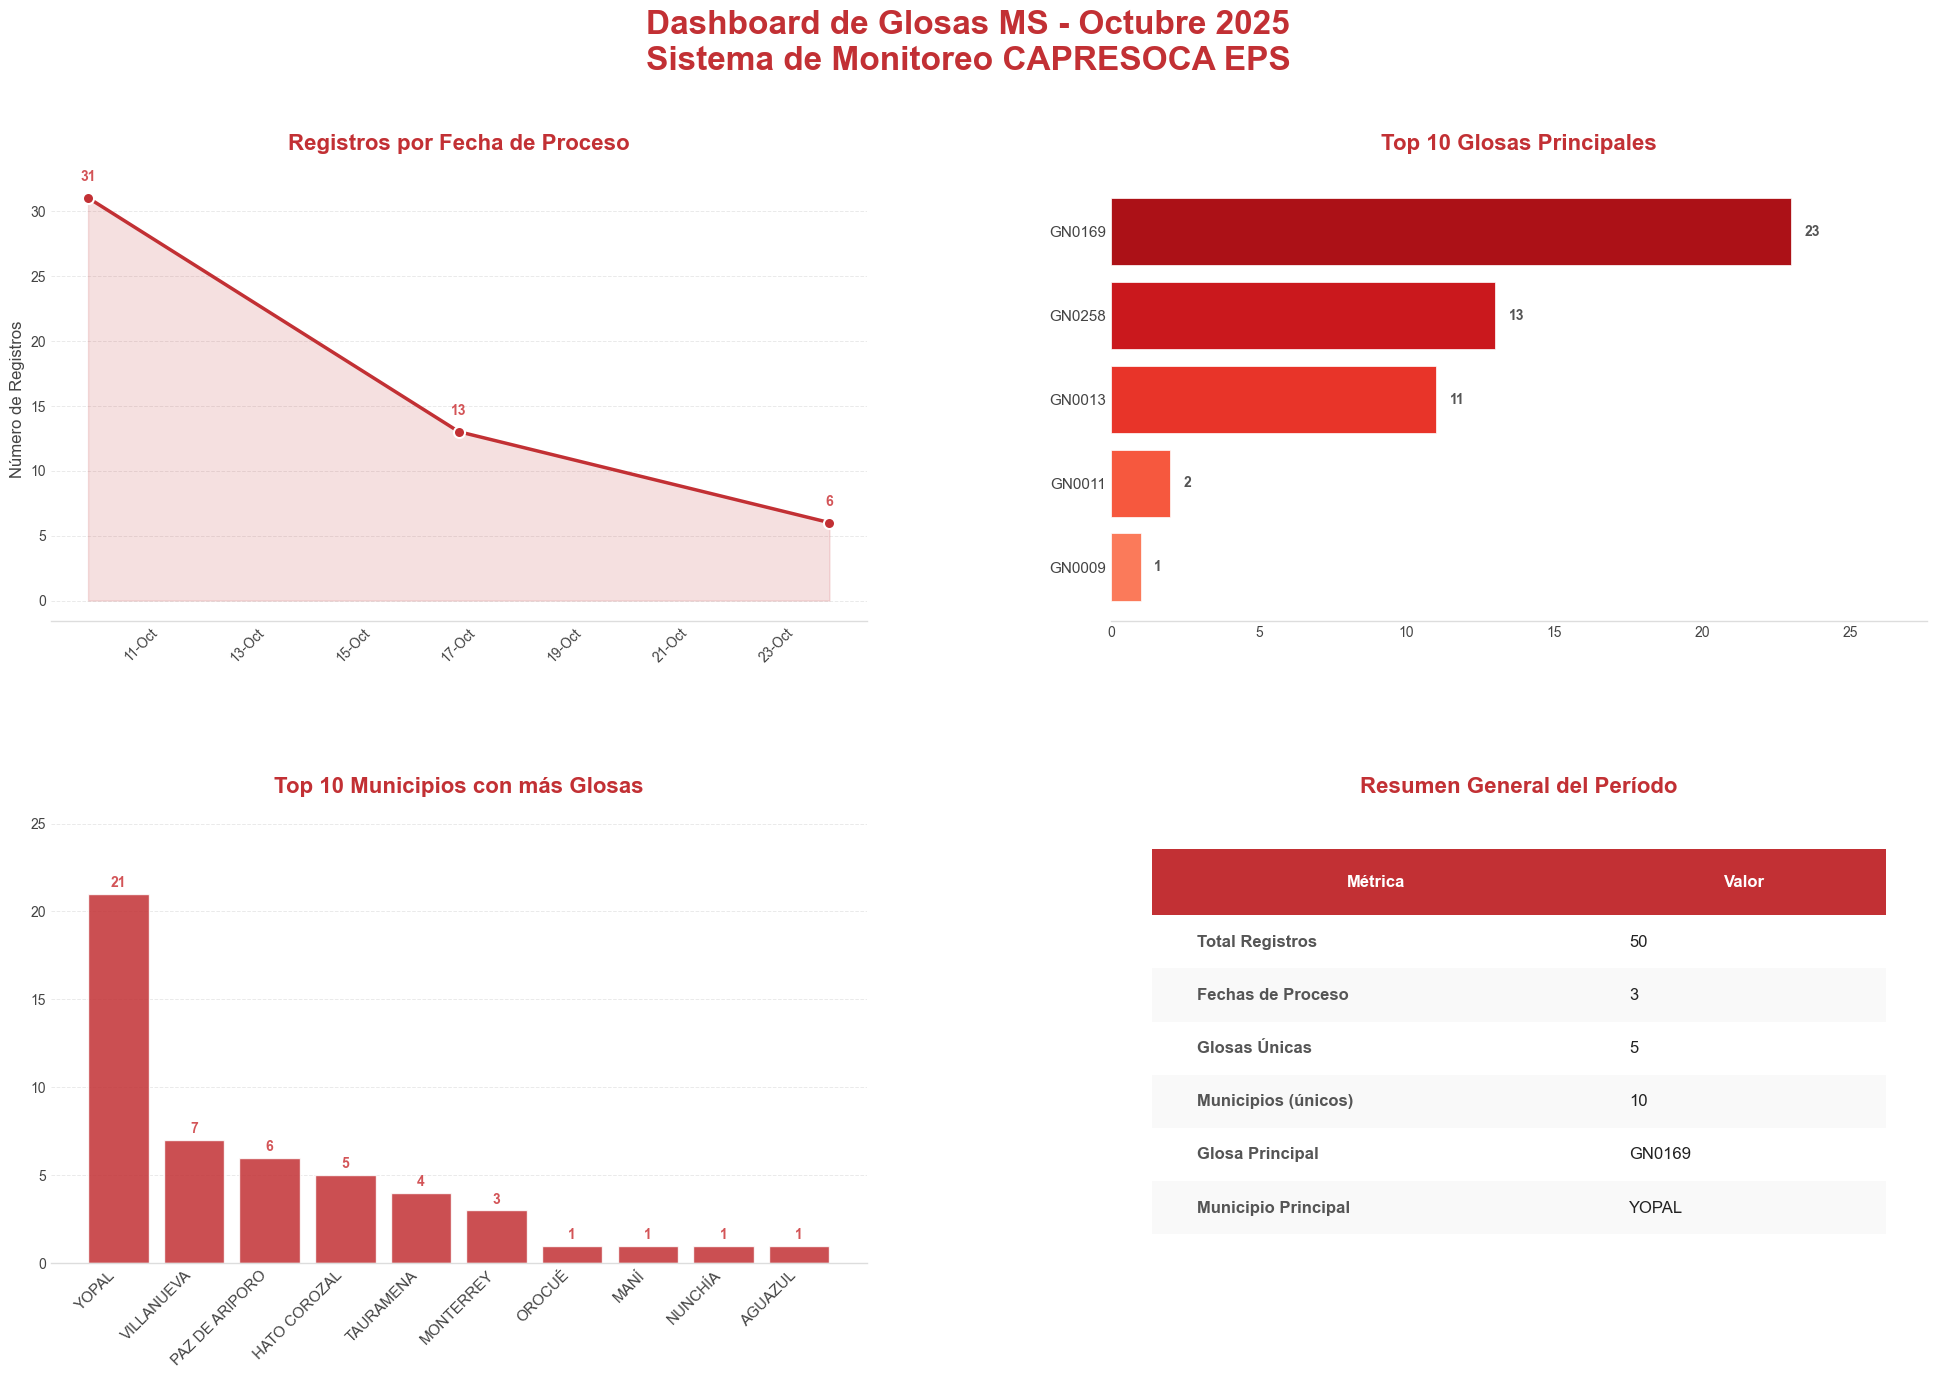

🚀 Dashboard guardado como PNG en: C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #11\ACTIVIDAD 14\Informe Glosas\anexos\Dashboard_Glosas_MS_Octubre_2025.png
📊 RESUMEN DASHBOARD GLOSAS OCTUBRE 2025
📅 Período analizado: 10/10/2025 - 24/10/2025
📋 Total registros procesados: 50
🏥 Glosa más frecuente: GN0169 (23 casos - 46.0%)
🏘️ Municipio con más casos: YOPAL (21 registros - 42.0%)
📈 Promedio registros por día: 16.7
📊 Concentración top 5 glosas: 100.0%
🎯 Archivo guardado: Dashboard_Glosas_MS_Octubre_2025.png

¡El dashboard está listo! La ruta para insertar en Word es:
C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #11\ACTIVIDAD 14\Informe Glosas\anexos\Dashboard_Glosas_MS_Octubre_2025.png


In [18]:
# Definición de la paleta institucional (Rojo y Verde)
PALETA_EPS = ['#C23034', '#289452', '#D35457', '#42A862']


def crear_dashboard_ms_mejorado(df_ms, mes_trabajo, año_trabajo, PALETA_EPS, R_Salida):
    
    # --- NO SE NECESITA CÓDIGO DE MAPEO ---
    # La columna 'Nombre Municipio' ya está en df_ms
    # -------------------------------------

    # Obtener nombre del mes en español
    meses_esp = {
        1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
        5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
        9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
    }
    mes_nombre = meses_esp[mes_trabajo]
    
    # Crear carpeta anexos si no existe
    carpeta_anexos = os.path.join(R_Salida, "anexos")
    os.makedirs(carpeta_anexos, exist_ok=True)
    
    # --- Configuración General de Matplotlib ---
    plt.style.use('seaborn-v0_8-whitegrid') # Estilo base más moderno
    
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'Helvetica', 'Lato'],
        'text.color': '#444444',
        'axes.labelcolor': '#444444',
        'xtick.color': '#444444',
        'ytick.color': '#444444',
        'axes.edgecolor': 'white',
        'axes.facecolor': 'white',
        'figure.facecolor': 'white',
        'grid.color': '#EAEAEA',
        'grid.linewidth': 0.8,
        'axes.titlesize': 16,
        'axes.titleweight': 'bold',
        'figure.titlesize': 26,
        'figure.titleweight': 'bold',
        'lines.linewidth': 2.5,
        'lines.markerfacecolor': PALETA_EPS[0],
        'lines.markeredgecolor': 'white',
        'lines.markeredgewidth': 1.5,
    })

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))
    
    fig.suptitle(f'Dashboard de Glosas MS - {mes_nombre} {año_trabajo}\nSistema de Monitoreo CAPRESOCA EPS', 
                 fontsize=24, fontweight='bold', color=PALETA_EPS[0], y=1.0) 

    # --- 1. Gráfica de registros por fecha con área sombreada ---
    registros_por_fecha = df_ms.groupby('Fecha_Proceso_dt').size()
    
    ax1.plot(registros_por_fecha.index, registros_por_fecha.values, 
             color=PALETA_EPS[0], linewidth=2.5, marker='o', markersize=8, markeredgecolor='white')
    ax1.fill_between(registros_por_fecha.index, registros_por_fecha.values, 
                     alpha=0.15, color=PALETA_EPS[0])
    
    ax1.set_title('Registros por Fecha de Proceso', fontsize=16, fontweight='bold', pad=20, color=PALETA_EPS[0])
    ax1.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
    ax1.grid(False, which='major', axis='x')
    ax1.tick_params(axis='x', rotation=45, labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)
    ax1.set_ylabel('Número de Registros', fontsize=12)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_color('#DDDDDD')

    for i, val in enumerate(registros_por_fecha.values):
        ax1.annotate(f'{val}', (registros_por_fecha.index[i], val), 
                     textcoords="offset points", xytext=(0,12), ha='center',
                     fontsize=10, fontweight='bold', color=PALETA_EPS[2])
    
    ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%b')) 

    # --- 2. Top Glosas Principales ---
    top_glosas = df_ms['Glosa_Principal'].value_counts().nlargest(10).sort_values(ascending=True)
    
    n_colors = len(top_glosas)
    colors = [plt.cm.get_cmap('Reds')(x) for x in np.linspace(0.45, 0.85, n_colors)]
    
    bars = ax2.barh(range(len(top_glosas)), top_glosas.values, color=colors, 
                    edgecolor='white', linewidth=0.5, height=0.8)
    ax2.set_yticks(range(len(top_glosas)))
    ax2.set_yticklabels(top_glosas.index, fontsize=11)
    ax2.set_title('Top 10 Glosas Principales', fontsize=16, fontweight='bold', pad=20, color=PALETA_EPS[0])
    ax2.grid(False)
    ax2.tick_params(axis='x', labelsize=10)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_color('#DDDDDD')
    ax2.set_xlim(0, max(top_glosas.values) * 1.20)

    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax2.text(width + (max(top_glosas.values) * 0.02), bar.get_y() + bar.get_height()/2, 
                 f'{int(width)}', ha='left', va='center', fontsize=10, fontweight='bold', color='#555555')
    
    # --- 3. Top municipios ---
    top_municipios = df_ms['Nombre Municipio'].value_counts().head(10)
    
    bars3 = ax3.bar(top_municipios.index, top_municipios.values, 
                    color=PALETA_EPS[0], alpha=0.85, edgecolor='white', linewidth=1)
    
    ax3.set_xticklabels(top_municipios.index, rotation=45, ha='right', fontsize=11)
    
    ax3.set_title('Top 10 Municipios con más Glosas', fontsize=16, fontweight='bold', pad=20, color=PALETA_EPS[0])
    ax3.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
    ax3.grid(False, which='major', axis='x')
    ax3.tick_params(axis='y', labelsize=10)
    ax3.set_ylim(0, max(top_municipios.values) * 1.20)
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.spines['bottom'].set_color('#DDDDDD')

    for bar in bars3:
        height = bar.get_height()
        ax3.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10, fontweight='bold', color=PALETA_EPS[2])
    
    # --- 4. Tabla resumen con métricas ---
    ax4.axis('off')
    
    total_registros = len(df_ms)
    fechas_unicas = df_ms['Fecha_Proceso_dt'].nunique()
    glosas_unicas = df_ms['Glosa_Principal'].nunique()
    municipios_unicos = df_ms['Nombre Municipio'].nunique() 
    fecha_min = df_ms['Fecha_Proceso_dt'].min().strftime('%d/%m/%Y')
    fecha_max = df_ms['Fecha_Proceso_dt'].max().strftime('%d/%m/%Y')
    promedio_diario = total_registros / fechas_unicas if fechas_unicas > 0 else 0
    municipio_principal_nombre = top_municipios.index[0]
    
    tabla_data = [
        ['Total Registros', f'{total_registros:,}'],
        ['Fechas de Proceso', f'{fechas_unicas}'],
        ['Glosas Únicas', f'{glosas_unicas}'],
        ['Municipios (únicos)', f'{municipios_unicos}'],
        ['Glosa Principal', f'{top_glosas.index[-1]}'],
        ['Municipio Principal', f'{municipio_principal_nombre}']
    ]
    
    table = ax4.table(cellText=tabla_data,
                      colLabels=['Métrica', 'Valor'],
                      cellLoc='left',
                      loc='center',
                      colWidths=[0.55, 0.35])
    
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2.5)
    
    for (row, col), cell in table.get_celld().items():
        cell.set_edgecolor('none')
        if row == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor(PALETA_EPS[0])
            cell.set_height(0.15)
        else:
            cell.set_facecolor('#F9F9F9' if row % 2 == 0 else 'white')
            cell.set_height(0.12)
            if col == 0:
                cell.get_text().set_weight('bold')
                cell.get_text().set_color('#555555')
            else:
                cell.get_text().set_color('#222222')

    ax4.set_title('Resumen General del Período', fontsize=16, fontweight='bold', pad=20, color=PALETA_EPS[0])
    
    # --- Ajustar layout y guardar ---
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.88, hspace=0.45, wspace=0.3)
    
    
    nombre_archivo_png = f"Dashboard_Glosas_MS_{mes_nombre}_{año_trabajo}.png"
    ruta_png = os.path.join(carpeta_anexos, nombre_archivo_png)
    
    plt.savefig(ruta_png, dpi=300, bbox_inches='tight', facecolor='white', format='png')
    
    plt.show()

    print(f"🚀 Dashboard guardado como PNG en: {ruta_png}")
    print(f"📊 RESUMEN DASHBOARD GLOSAS {mes_nombre.upper()} {año_trabajo}")
    print("="*70)
    print(f"📅 Período analizado: {fecha_min} - {fecha_max}")
    print(f"📋 Total registros procesados: {total_registros:,}")
    print(f"🏥 Glosa más frecuente: {top_glosas.index[-1]} ({top_glosas.iloc[-1]:,} casos - {(top_glosas.iloc[-1]/total_registros*100):.1f}%)")
    print(f"🏘️ Municipio con más casos: {municipio_principal_nombre} ({top_municipios.iloc[0]:,} registros - {(top_municipios.iloc[0]/total_registros*100):.1f}%)")
    print(f"📈 Promedio registros por día: {promedio_diario:.1f}")
    print(f"📊 Concentración top 5 glosas: {(top_glosas.tail(5).sum()/total_registros*100):.1f}%")
    print(f"🎯 Archivo guardado: {nombre_archivo_png}")
    
    return fig, ruta_png


# Ejecutar la función
fig_dashboard, ruta_archivo_png_1 = crear_dashboard_ms_mejorado(
    df_ms, 
    mes_trabajo, 
    año_trabajo, 
    PALETA_EPS, 
    R_Salida
)

print(f"\n¡El dashboard está listo! La ruta para insertar en Word es:\n{ruta_archivo_png_1}")

## RESUMEN POR USUARIO MS

📊 RESUMEN POR USUARIO GRABADO
👥 Total de usuarios: 25
📋 Total de registros: 50
📈 Promedio por usuario: 2.0
🥇 Usuario con más registros: karen.melo (5 registros)
📊 Top 3 usuarios concentran: 30.0% del total
💾 Imagen guardada en: C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #11\ACTIVIDAD 14\Informe Glosas\anexos\Grafico_Usuarios_MS_10_2025.png


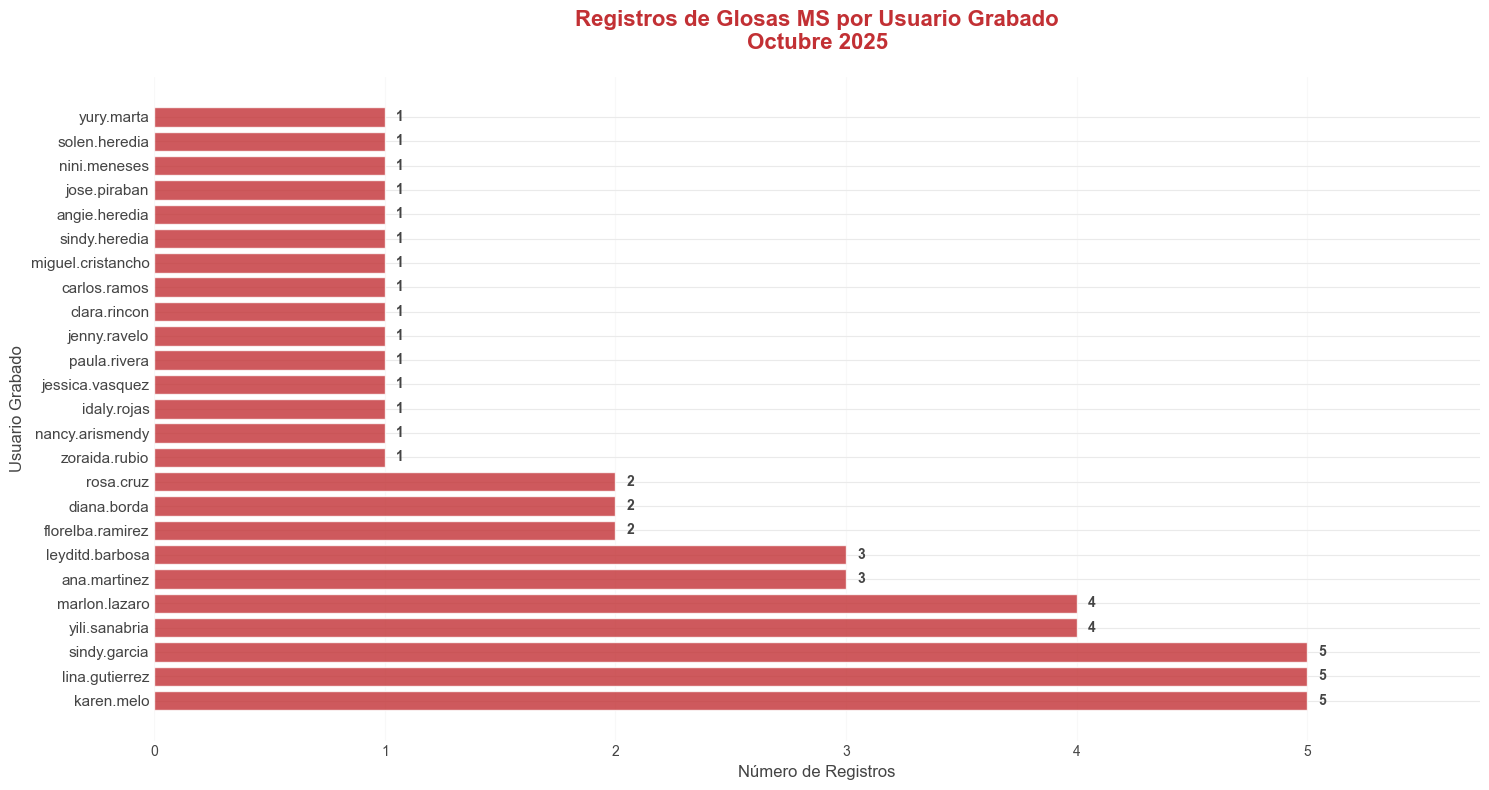

In [19]:
# Crear visualización de registros por Usuario Grabado
plt.figure(figsize=(15, 8))

# Contar registros por usuario y ordenar de mayor a menor
usuarios_count = df_ms['Usuario Grabado'].value_counts()

# Crear gráfico de barras horizontal
bars = plt.barh(range(len(usuarios_count)), usuarios_count.values, 
                color=PALETA_EPS[0], alpha=0.8, edgecolor='white', linewidth=1)

# Configurar etiquetas del eje Y
plt.yticks(range(len(usuarios_count)), usuarios_count.index, fontsize=11)

# Configurar títulos y etiquetas
plt.title('Registros de Glosas MS por Usuario Grabado\nOctubre 2025', 
          fontsize=16, fontweight='bold', color=PALETA_EPS[0], pad=20)
plt.xlabel('Número de Registros', fontsize=12)
plt.ylabel('Usuario Grabado', fontsize=12)

# Agregar valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + (max(usuarios_count.values) * 0.01), bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center', fontsize=10, fontweight='bold')

# Configurar grid y estilo
plt.grid(True, axis='x', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Ajustar límites del eje X
plt.xlim(0, max(usuarios_count.values) * 1.15)

# Ajustar layout
plt.tight_layout()

# Guardar la imagen en la carpeta anexos
carpeta_anexos = os.path.join(R_Salida, "anexos")
os.makedirs(carpeta_anexos, exist_ok=True)

#Guardar imagen
nombre_archivo_usuarios = f"Grafico_Usuarios_MS_{mes_trabajo}_{año_trabajo}.png"
ruta_archivo_png_2 = os.path.join(carpeta_anexos, nombre_archivo_usuarios)
plt.savefig(ruta_archivo_png_2, dpi=300, bbox_inches='tight', 
           facecolor='white', format='png')


# Mostrar estadísticas resumidas
total_registros = len(df_ms)
total_usuarios = len(usuarios_count)
promedio_por_usuario = total_registros / total_usuarios

print(f"📊 RESUMEN POR USUARIO GRABADO")
print("=" * 50)
print(f"👥 Total de usuarios: {total_usuarios}")
print(f"📋 Total de registros: {total_registros}")
print(f"📈 Promedio por usuario: {promedio_por_usuario:.1f}")
print(f"🥇 Usuario con más registros: {usuarios_count.index[0]} ({usuarios_count.iloc[0]} registros)")
print(f"📊 Top 3 usuarios concentran: {(usuarios_count.head(3).sum()/total_registros*100):.1f}% del total")
print(f"💾 Imagen guardada en: {ruta_archivo_png_2}")

plt.show()

# Informe S3 

## dashboard S3

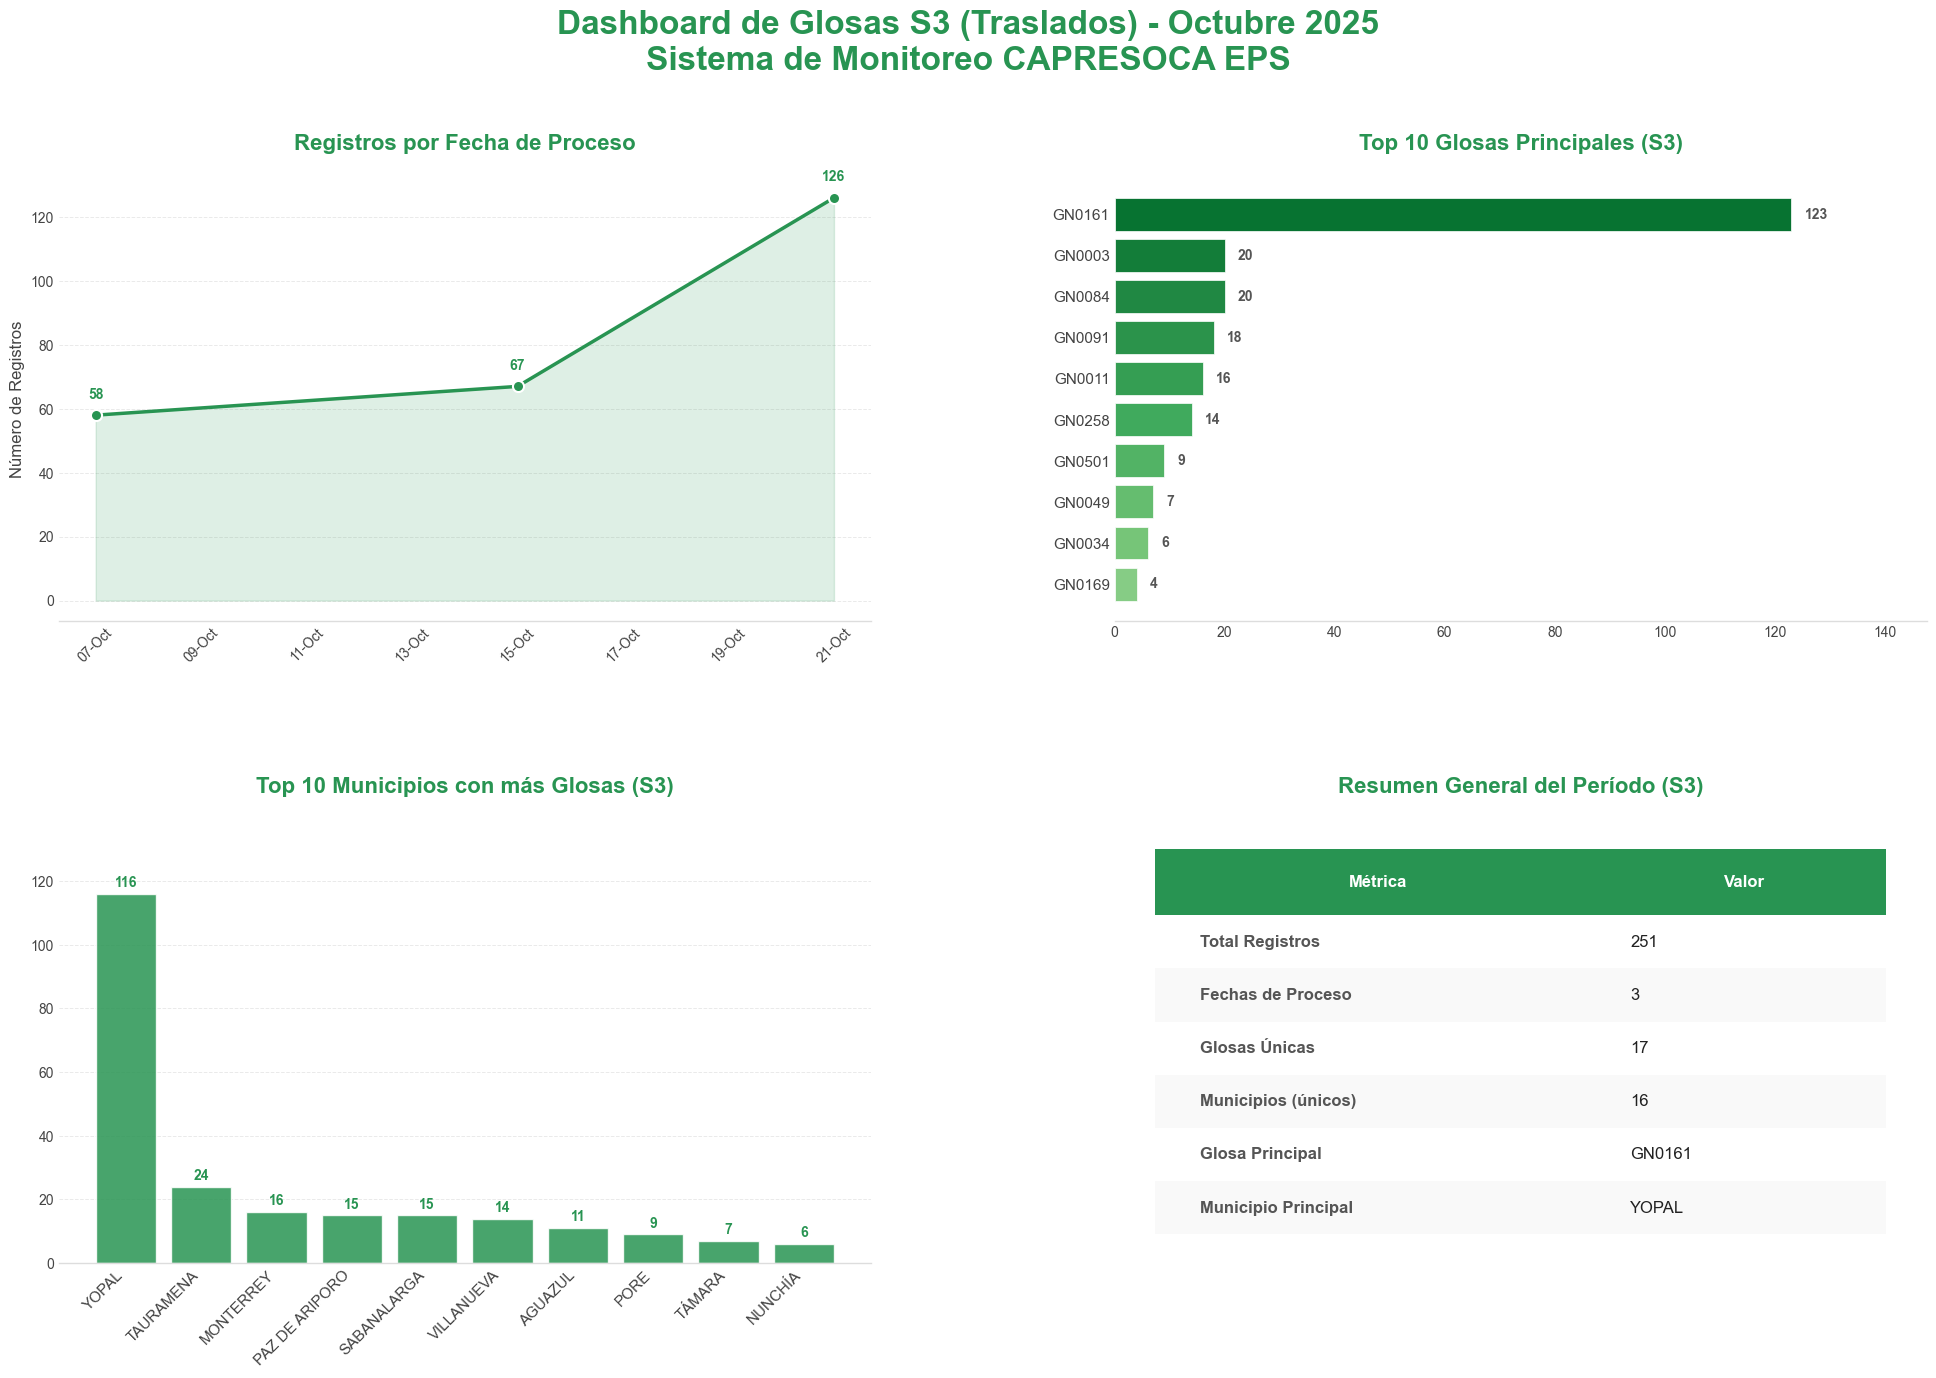

🚀 Dashboard S3 guardado como PNG en: C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #11\ACTIVIDAD 14\Informe Glosas\anexos\Dashboard_Glosas_S3_Octubre_2025.png
📊 RESUMEN DASHBOARD GLOSAS S3 OCTUBRE 2025
📅 Período analizado: 07/10/2025 - 21/10/2025
📋 Total registros procesados: 251
🏥 Glosa más frecuente: GN0161 (123 casos - 49.0%)
🏘️ Municipio con más casos: YOPAL (116 registros - 46.2%)
📈 Promedio registros por día: 83.7
📊 Concentración top 5 glosas: 78.5%
🎯 Archivo guardado: C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #11\ACTIVIDAD 14\Informe Glosas\anexos\Dashboard_Glosas_S3_Octubre_2025.png

¡El dashboard de S3 está listo! La ruta es:
C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #11\ACTIVIDAD 14\Informe Glosas\anexos\Dashboard_Glosas_S3_Octubre_2025.png


In [20]:
def crear_dashboard_s3_mejorado(df_s3, mes_trabajo, año_trabajo, PALETA_EPS, R_Salida):
    
    # Obtener nombre del mes en español
    meses_esp = {
        1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
        5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
        9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
    }
    mes_nombre = meses_esp[mes_trabajo]
    
    # Crear carpeta anexos si no existe
    carpeta_anexos = os.path.join(R_Salida, "anexos")
    os.makedirs(carpeta_anexos, exist_ok=True)
    
    # Configuración General de Matplotlib
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        'font.family': 'sans-serif', 'font.sans-serif': ['Arial', 'Helvetica', 'Lato'],
        'text.color': '#444444', 'axes.labelcolor': '#444444',
        'xtick.color': '#444444', 'ytick.color': '#444444',
        'axes.edgecolor': 'white', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
        'grid.color': '#EAEAEA', 'grid.linewidth': 0.8,
        'axes.titlesize': 16, 'axes.titleweight': 'bold',
        'figure.titlesize': 26, 'figure.titleweight': 'bold',
        'lines.linewidth': 2.5, 'lines.markerfacecolor': PALETA_EPS[1], 'lines.markeredgecolor': 'white',
        'lines.markeredgewidth': 1.5,
    })

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))
    
    fig.suptitle(f'Dashboard de Glosas S3 (Traslados) - {mes_nombre} {año_trabajo}\nSistema de Monitoreo CAPRESOCA EPS', 
                 fontsize=24, fontweight='bold', color=PALETA_EPS[1], y=1.0) 

    # --- 1. Gráfica de registros por fecha con etiquetas ---
    registros_por_fecha = df_s3.groupby('Fecha_Proceso_dt').size()
    
    ax1.plot(registros_por_fecha.index, registros_por_fecha.values, 
             color=PALETA_EPS[1], linewidth=2.5, marker='o', markersize=8, markeredgecolor='white')
    ax1.fill_between(registros_por_fecha.index, registros_por_fecha.values, 
                     alpha=0.15, color=PALETA_EPS[1])
    
    ax1.set_title('Registros por Fecha de Proceso', fontsize=16, fontweight='bold', pad=20, color=PALETA_EPS[1])
    ax1.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
    ax1.grid(False, which='major', axis='x')
    ax1.tick_params(axis='x', rotation=45, labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)
    ax1.set_ylabel('Número de Registros', fontsize=12)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_color('#DDDDDD')

    for i, val in enumerate(registros_por_fecha.values):
        ax1.annotate(f'{val}', (registros_por_fecha.index[i], val), 
                     textcoords="offset points", xytext=(0,12), ha='center',
                     fontsize=10, fontweight='bold', color=PALETA_EPS[1])
    
    ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%b'))

    # --- 2. Top Glosas Principales con etiquetas ---
    top_glosas = df_s3['Glosa_Principal'].value_counts().nlargest(10).sort_values(ascending=True)
    
    n_colors = len(top_glosas)
    colors = [plt.cm.get_cmap('Greens')(x) for x in np.linspace(0.45, 0.85, n_colors)]
    
    bars = ax2.barh(range(len(top_glosas)), top_glosas.values, color=colors, 
                    edgecolor='white', linewidth=0.5, height=0.8)
    ax2.set_yticks(range(len(top_glosas)))
    ax2.set_yticklabels(top_glosas.index, fontsize=11)
    ax2.set_title('Top 10 Glosas Principales (S3)', fontsize=16, fontweight='bold', pad=20, color=PALETA_EPS[1])
    ax2.grid(False)
    ax2.tick_params(axis='x', labelsize=10)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_color('#DDDDDD')
    ax2.set_xlim(0, max(top_glosas.values) * 1.20)

    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax2.text(width + (max(top_glosas.values) * 0.02), bar.get_y() + bar.get_height()/2, 
                 f'{int(width)}', ha='left', va='center', fontsize=10, fontweight='bold', color='#555555')

    # --- 3. Top municipios con etiquetas ---
    top_municipios = df_s3['Nombre Municipio'].value_counts().head(10)
    
    bars3 = ax3.bar(top_municipios.index, top_municipios.values, 
                    color=PALETA_EPS[1], alpha=0.85, edgecolor='white', linewidth=1)
    
    ax3.set_xticklabels(top_municipios.index, rotation=45, ha='right', fontsize=11)
    
    ax3.set_title('Top 10 Municipios con más Glosas (S3)', fontsize=16, fontweight='bold', pad=20, color=PALETA_EPS[1])
    ax3.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
    ax3.grid(False, which='major', axis='x')
    ax3.tick_params(axis='y', labelsize=10)
    ax3.set_ylim(0, max(top_municipios.values) * 1.20)
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.spines['bottom'].set_color('#DDDDDD')

    for bar in bars3:
        height = bar.get_height()
        ax3.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10, fontweight='bold', color=PALETA_EPS[1])

    # --- 4. Tabla resumen mejorada ---
    ax4.axis('off')
    
    total_registros = len(df_s3)
    fechas_unicas = df_s3['Fecha_Proceso_dt'].nunique()
    glosas_unicas = df_s3['Glosa_Principal'].nunique()
    municipios_unicos = df_s3['Nombre Municipio'].nunique()
    fecha_min = df_s3['Fecha_Proceso_dt'].min().strftime('%d/%m/%Y')
    fecha_max = df_s3['Fecha_Proceso_dt'].max().strftime('%d/%m/%Y')
    promedio_diario = total_registros / fechas_unicas if fechas_unicas > 0 else 0
    municipio_principal_nombre = top_municipios.index[0]
    
    tabla_data = [
        ['Total Registros', f'{total_registros:,}'],
        ['Fechas de Proceso', f'{fechas_unicas}'],
        ['Glosas Únicas', f'{glosas_unicas}'],
        ['Municipios (únicos)', f'{municipios_unicos}'],
        ['Glosa Principal', f'{top_glosas.index[-1]}'],
        ['Municipio Principal', f'{municipio_principal_nombre}']
    ]
    
    table = ax4.table(cellText=tabla_data,
                      colLabels=['Métrica', 'Valor'],
                      cellLoc='left',
                      loc='center',
                      colWidths=[0.55, 0.35])
    
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2.5)
    
    for (row, col), cell in table.get_celld().items():
        cell.set_edgecolor('none')
        if row == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor(PALETA_EPS[1])
            cell.set_height(0.15)
        else:
            cell.set_facecolor('#F9F9F9' if row % 2 == 0 else 'white')
            cell.set_height(0.12)
            if col == 0:
                cell.get_text().set_weight('bold')
                cell.get_text().set_color('#555555')
            else:
                cell.get_text().set_color('#222222')

    ax4.set_title('Resumen General del Período (S3)', fontsize=16, fontweight='bold', pad=20, color=PALETA_EPS[1])
    
    # --- Ajustar layout y guardar ---
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.88, hspace=0.45, wspace=0.3)
    
    ruta_archivo_png_3 = f"Dashboard_Glosas_S3_{mes_nombre}_{año_trabajo}.png"
    ruta_archivo_png_3 = os.path.join(carpeta_anexos, ruta_archivo_png_3)
    plt.savefig(ruta_archivo_png_3, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

    # --- Resumen final impreso ---
    print(f"🚀 Dashboard S3 guardado como PNG en: {ruta_archivo_png_3}")
    print(f"📊 RESUMEN DASHBOARD GLOSAS S3 {mes_nombre.upper()} {año_trabajo}")
    print("="*70)
    print(f"📅 Período analizado: {fecha_min} - {fecha_max}")
    print(f"📋 Total registros procesados: {total_registros:,}")
    print(f"🏥 Glosa más frecuente: {top_glosas.index[-1]} ({top_glosas.iloc[-1]:,} casos - {(top_glosas.iloc[-1]/total_registros*100):.1f}%)")
    print(f"🏘️ Municipio con más casos: {municipio_principal_nombre} ({top_municipios.iloc[0]:,} registros - {(top_municipios.iloc[0]/total_registros*100):.1f}%)")
    print(f"📈 Promedio registros por día: {promedio_diario:.1f}")
    print(f"📊 Concentración top 5 glosas: {(top_glosas.tail(5).sum()/total_registros*100):.1f}%")
    print(f"🎯 Archivo guardado: {ruta_archivo_png_3}")
    
    return fig, ruta_archivo_png_3

# Ejecutar la función para el dashboard S3
fig_dashboard_s3, ruta_archivo_png_3 = crear_dashboard_s3_mejorado(
    df_s3, 
    mes_trabajo, 
    año_trabajo, 
    PALETA_EPS, 
    R_Salida
)
print(f"\n¡El dashboard de S3 está listo! La ruta es:\n{ruta_archivo_png_3}")

## RESUMEN POR USUARIO S3

📊 RESUMEN POR USUARIO GRABADO (S3)
👥 Total de usuarios: 36
📋 Total de registros con usuario: 250
📈 Promedio por usuario: 7.0
🥇 Usuario con más registros: lina.gutierrez (56 registros)
📊 Top 3 usuarios concentran: 44.6% del total
💾 Imagen guardada en: C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #11\ACTIVIDAD 14\Informe Glosas\anexos\Grafico_Usuarios_S3_Octubre_2025.png


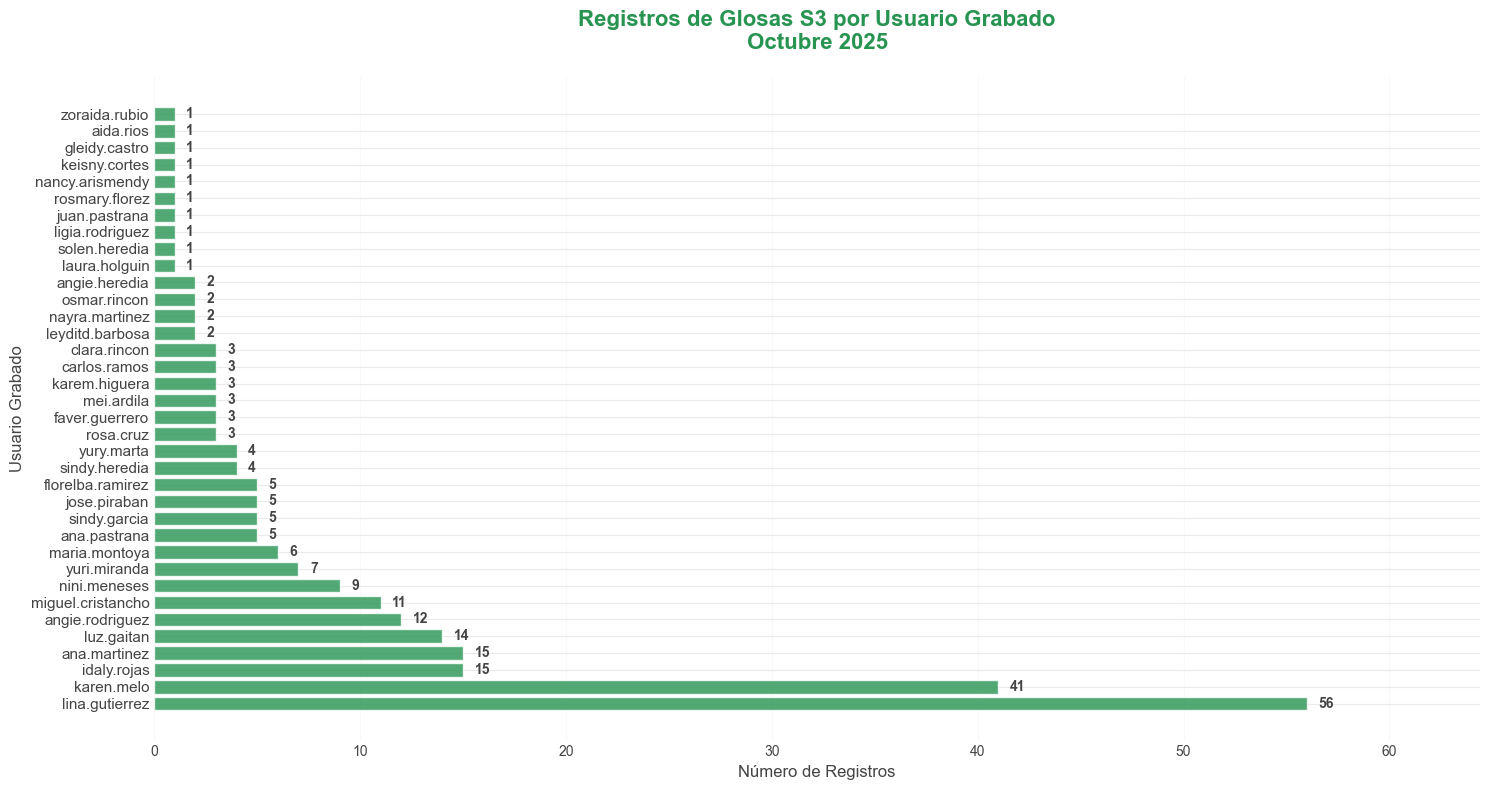

In [21]:
meses_esp = {
        1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
        5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
        9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
    }
mes_nombre = meses_esp[mes_trabajo]

# Crear visualización de registros por Usuario Grabado para S3
plt.figure(figsize=(15, 8))

# Contar registros por usuario y ordenar de mayor a menor, manejando posibles NaN
usuarios_count_s3 = df_s3['Usuario Grabado'].dropna().value_counts()

# Verificar si hay datos para graficar
if not usuarios_count_s3.empty:
    # Crear gráfico de barras horizontal
    bars_s3 = plt.barh(range(len(usuarios_count_s3)), usuarios_count_s3.values, 
                    color=PALETA_EPS[1], alpha=0.8, edgecolor='white', linewidth=1)

    # Configurar etiquetas del eje Y
    plt.yticks(range(len(usuarios_count_s3)), usuarios_count_s3.index, fontsize=11)

    # Configurar títulos y etiquetas
    plt.title(f'Registros de Glosas S3 por Usuario Grabado\n{mes_nombre} {año_trabajo}', 
              fontsize=16, fontweight='bold', color=PALETA_EPS[1], pad=20)
    plt.xlabel('Número de Registros', fontsize=12)
    plt.ylabel('Usuario Grabado', fontsize=12)

    # Agregar valores en las barras
    for i, bar in enumerate(bars_s3):
        width = bar.get_width()
        plt.text(width + (max(usuarios_count_s3.values) * 0.01), bar.get_y() + bar.get_height()/2, 
                 f'{int(width)}', ha='left', va='center', fontsize=10, fontweight='bold')

    # Configurar grid y estilo
    plt.grid(True, axis='x', alpha=0.3)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    # Ajustar límites del eje X
    plt.xlim(0, max(usuarios_count_s3.values) * 1.15)

    # Ajustar layout
    plt.tight_layout()

    # Guardar la imagen en la carpeta anexos
    carpeta_anexos = os.path.join(R_Salida, "anexos")
    os.makedirs(carpeta_anexos, exist_ok=True)

    # Guardar imagen
    nombre_archivo_usuarios_s3 = f"Grafico_Usuarios_S3_{mes_nombre}_{año_trabajo}.png"
    ruta_archivo_png_4 = os.path.join(carpeta_anexos, nombre_archivo_usuarios_s3)
    plt.savefig(ruta_archivo_png_4, dpi=300, bbox_inches='tight', 
               facecolor='white', format='png')

    # Mostrar estadísticas resumidas
    total_registros_s3 = len(df_s3)
    total_usuarios_s3 = len(usuarios_count_s3)
    promedio_por_usuario_s3 = total_registros_s3 / total_usuarios_s3 if total_usuarios_s3 > 0 else 0

    print(f"📊 RESUMEN POR USUARIO GRABADO (S3)")
    print("=" * 50)
    print(f"👥 Total de usuarios: {total_usuarios_s3}")
    print(f"📋 Total de registros con usuario: {usuarios_count_s3.sum()}")
    print(f"📈 Promedio por usuario: {promedio_por_usuario_s3:.1f}")
    print(f"🥇 Usuario con más registros: {usuarios_count_s3.index[0]} ({usuarios_count_s3.iloc[0]} registros)")
    if total_registros_s3 > 0:
        print(f"📊 Top 3 usuarios concentran: {(usuarios_count_s3.head(3).sum()/total_registros_s3*100):.1f}% del total")
    print(f"💾 Imagen guardada en: {ruta_archivo_png_4}")

    plt.show()
else:
    print("No se encontraron datos de 'Usuario Grabado' para graficar en el período seleccionado para S3.")


# Contruccion Docx

In [ ]:
def actualizar_documento_word(R_Documento, fecha_trabajo, mes_nombre, año_trabajo, imagenes_dict, df_ms, df_s3, R_Salida, tablas_dict):
    """
    Actualiza un documento de Word reemplazando etiquetas con valores dinámicos e imágenes.
    
    Parámetros:
    - R_Documento: Ruta al documento Word plantilla
    - fecha_trabajo: Fecha en formato dd/mm/yyyy
    - mes_nombre: Nombre del mes (ej: "Octubre")
    - año_trabajo: Año como entero
    - imagenes_dict: Diccionario con {placeholder: ruta_imagen}.
    - df_ms: DataFrame con los datos de MS
    - R_Salida: Carpeta donde guardar el documento actualizado
    - tablas_dict: Diccionario con {placeholder: DataFrame} para tablas
    """
    
    # Cargar el documento Word
    doc = Document(R_Documento)

    # --- Generar la fecha de elaboración del informe (fecha actual) ---
    fecha_actual = datetime.now()
    meses_esp = {
        1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
        5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
        9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
    }
    # Formato: "{{dia}} de {{mes}} de {{año}}"
    fecha_elaboracion = f"{fecha_actual.day} de {meses_esp[fecha_actual.month]} de {fecha_actual.year}"

    
    # --- Definir los valores para reemplazar las etiquetas ---
    
    # Obtener estadísticas del dataframe para los párrafos MS
    total_registros = len(df_ms)
    glosas_unicas = df_ms['Glosa_Principal'].nunique()
    municipios_unicos = df_ms['Nombre Municipio'].nunique()
    
    # Obtener estadísticas del dataframe para los párrafos S3
    total_registros_s3 = len(df_s3)
    glosas_unicas_s3 = df_s3['Glosa_Principal'].nunique()
    municipios_unicos_s3 = df_s3['Nombre Municipio'].nunique()
    
    # Glosa más frecuente MS
    top_glosa = df_ms['Glosa_Principal'].value_counts().index[0]
    top_glosa_count = df_ms['Glosa_Principal'].value_counts().iloc[0]
    # Buscar la descripción de la glosa principal MS---
    descripcion_top_glosa = df_glosas[df_glosas['Glosa'] == top_glosa]['Descripción'].iloc[0]
    
    # Glosa más frecuente S3
    top_glosa_s3 = df_s3['Glosa_Principal'].value_counts().index[0]
    top_glosa_count_s3 = df_s3['Glosa_Principal'].value_counts().iloc[0]
    # Buscar la descripción de la glosa principal S3 ---
    descripcion_top_glosa_s3 = df_glosas[df_glosas['Glosa'] == top_glosa_s3]['Descripción'].iloc[0]
    
    # Municipio con más registros MS
    top_municipio = df_ms['Nombre Municipio'].value_counts().index[0]
    top_municipio_count = df_ms['Nombre Municipio'].value_counts().iloc[0]
    
    # Municipio con más registros S3
    top_municipio_s3 = df_s3['Nombre Municipio'].value_counts().index[0]
    top_municipio_count_s3 = df_s3['Nombre Municipio'].value_counts().iloc[0]
    
    # Usuario con más registros MS
    top_usuario = df_ms['Usuario Grabado'].value_counts().index[0]
    top_usuario_count = df_ms['Usuario Grabado'].value_counts().iloc[0]
    
    # Usuario con más registros S3
    top_usuario_s3 = df_s3['Usuario Grabado'].value_counts().index[0]
    top_usuario_count_s3 = df_s3['Usuario Grabado'].value_counts().iloc[0]
    
    # Diccionario con todas las etiquetas a reemplazar
    etiquetas_reemplazo = {
        '{{mes}}': mes_nombre,
        '{{ano}}': str(año_trabajo),
        '{{fecha}}': fecha_elaboracion,
        
        # Párrafo 1: Resumen general MS
        '{{1_Parrafo}}': f"""Durante el mes de {mes_nombre} de {año_trabajo}, se procesaron un total de {total_registros:,} registros de glosas MS (Maestro de Ingresos régimen Subsidiado) en el sistema BDUA. Este análisis comprende {glosas_unicas} tipos diferentes de glosas distribuidas en {municipios_unicos} municipios del área de cobertura de CAPRESOCA EPS. 

        La glosa más frecuente corresponde al código {top_glosa} ({descripcion_top_glosa}) con {top_glosa_count:,} casos ({(top_glosa_count/total_registros*100):.1f}% del total), lo que indica la necesidad de implementar acciones correctivas específicas para reducir su incidencia en futuros procesos.""",
        
        # Párrafo 2: Análisis territorial Ms
        '{{2_Parrafo}}': f"""El análisis territorial revela que el municipio de {top_municipio} concentra la mayor cantidad de registros con glosas, representando {top_municipio_count:,} casos ({(top_municipio_count/total_registros*100):.1f}% del total). Esta concentración sugiere la importancia de fortalecer los procesos de validación y calidad de datos en las zonas con mayor volumen de afiliaciones.

        La distribución geográfica de las glosas permite identificar patrones territoriales que requieren atención prioritaria para mejorar la calidad de los procesos de afiliación y reducir las tasas de rechazo por parte del ADRES.""",
        
        # Párrafo 3: Análisis por usuario MS
        '{{3_Parrafo}}': f"""Respecto al análisis por usuario grabado, se identifica que el usuario SIE {top_usuario} es responsable del mayor número de registros con glosas, acumulando {top_usuario_count:,} casos ({(top_usuario_count/total_registros*100):.1f}% del total). 

        Esta información es fundamental para establecer planes de capacitación específicos y fortalecer los controles de calidad en los procesos de digitación y validación de datos. La concentración de errores en usuarios específicos sugiere oportunidades de mejora en los procedimientos de capacitación y supervisión del personal.""",
        
        # Párrafo 4: Resumen general S3
        '{{4_Parrafo}}': f"""Durante el mes de {mes_nombre} de {año_trabajo}, se procesaron un total de {total_registros_s3:,} registros de glosas S3 (Archivo de Traslados Regimen Subsidiado) en el sistema BDUA. Este análisis comprende {glosas_unicas_s3} tipos diferentes de glosas distribuidas en {municipios_unicos_s3} municipios del área de cobertura de CAPRESOCA EPS. 
        
        La glosa más frecuente corresponde al código {top_glosa_s3} ({descripcion_top_glosa_s3}) con {top_glosa_count_s3:,} casos ({(top_glosa_count_s3/total_registros_s3*100):.1f}% del total), lo que indica la necesidad de implementar acciones correctivas específicas para reducir su incidencia en futuros procesos.""",
        
        # Párrafo 5: Análisis territorial S3
        '{{5_Parrafo}}': f"""El análisis territorial revela que el municipio de {top_municipio_s3} concentra la mayor cantidad de registros con glosas, representando {top_municipio_count_s3:,} casos ({(top_municipio_count_s3/total_registros_s3*100):.1f}% del total). Esta concentración sugiere la importancia de fortalecer los procesos de validación y calidad de datos en las zonas con mayor volumen de afiliaciones.

        La distribución geográfica de las glosas permite identificar patrones territoriales que requieren atención prioritaria para mejorar la calidad de los procesos de afiliación y reducir las tasas de rechazo por parte del ADRES.""",
        
        # Párrafo 6: Análisis por usuario S3
        '{{6_Parrafo}}': f"""Respecto al análisis por usuario grabado, se identifica que el usuario SIE {top_usuario_s3} es responsable del mayor número de registros con glosas, acumulando {top_usuario_count_s3:,} casos ({(top_usuario_count_s3/total_registros_s3*100):.1f}% del total). 

        Esta información es fundamental para establecer planes de capacitación específicos y fortalecer los controles de calidad en los procesos de digitación y validación de datos. La concentración de errores en usuarios específicos sugiere oportunidades de mejora en los procedimientos de capacitación y supervisión del personal.""",
        
        # Párrafo 7: Conclusiones
        '{{7_Parrafo}}': f"""El análisis de glosas correspondiente a {mes_nombre} de {año_trabajo} presenta los siguientes hallazgos clave:
        
        *   **Proceso de Ingresos (MS):** Se identificó un total de {total_registros:,} registros glosados. La glosa principal fue **{top_glosa}** ("{descripcion_top_glosa}"), el municipio con mayor incidencia fue **{top_municipio}** y el usuario con más registros asociados fue **{top_usuario}**.
        *   **Proceso de Traslados (S3):** Se procesaron {total_registros_s3:,} registros con glosas. La causa más recurrente fue la glosa **{top_glosa_s3}** ("{descripcion_top_glosa_s3}"), con una concentración territorial en **{top_municipio_s3}** y una mayor cantidad de registros gestionados por el usuario **{top_usuario_s3}**.

        Estos resultados cuantitativos establecen una línea base para identificar los focos de error y las áreas operativas que requieren mayor atención para la mejora continua de los procesos de aseguramiento.""",
        
        # Párrafo 8: Recomendaciones y Plan de Acción
        '{{8_Parrafo}}': f"""A partir de los hallazgos, es crucial entender que no todas las glosas derivan directamente de errores de digitación. Algunas, como la **GN0169**, pueden originarse por inconsistencias en las tablas de referencia de ADRES. Por tanto, se recomienda un enfoque dual:

        1.  **Análisis Cualitativo y Generalización:** Los líderes de proceso deben analizar las glosas más frecuentes, como **{top_glosa}** y **{top_glosa_s3}**, para diferenciar entre errores operativos y problemas externos. Se sugiere dialogar con los colaboradores de mayor incidencia ({top_usuario}, {top_usuario_s3}) para comprender las barreras que enfrentan (ej. formularios confusos, falta de herramientas de validación).

        2.  **Fortalecimiento de Procesos:**
            *   **Para Errores de Digitación:** Implementar estrategias de validación previas al cargue y reforzar las capacitaciones en los puntos de error detectados.
            *   **Para Glosas por Datos de Referencia:** Optimizar el cargue de soportes documentales al sistema SIE. Esto agilizará la gestión de PQR y auditorías necesarias para corregir la información en la fuente (ADRES).
            *   **c.	Para Errores de validación en la construcción del reporte BDUA:** identificar estrategias que puedan fortalecer el reporte en la fase de construcción, así como dar a conocer las barreras actuales a nivel de herramientas, metodologías de trabajo y de apoyo profesional.
        3.  **Estrategia Territorial:** Brindar acompañamiento focalizado a las oficinas de **{top_municipio}** para los procesos de MS y **{top_municipio_s3}** para los procesos de S3, buscando estandarizar procedimientos y asegurar la calidad del dato desde el origen.

        **Nota Técnica:** Los colores utilizados en los gráficos (rojo para MS, verde para S3) corresponden a la paleta institucional de CAPRESOCA EPS y no implican una valoración negativa o positiva de los procesos, sino una distinción visual para facilitar la interpretación del informe."""
    }
    
    # --- FUNCIÓN DE ANÁLISIS DE TEXTO ---
    def agregar_parrafo_formateado(p, texto_con_formato):
        """
        Analiza una cadena de texto con Markdown simple (**negrita**, * viñeta)
        y la agrega a un párrafo de Word con el formato correcto.
        """
        import re
        # Limpia el párrafo antes de agregar contenido nuevo
        p.text = ""
        
        # Divide el texto en líneas para procesar cada una
        for linea in texto_con_formato.strip().split('\n'):
            linea = linea.strip()
            if not linea:
                continue

            # Crea un nuevo párrafo para cada línea para manejar viñetas correctamente
            current_p = p.insert_paragraph_before()

            # Detectar si es un elemento de lista (viñeta)
            if linea.startswith('* '):
                current_p.style = 'List Paragraph'
                linea = linea[2:] # Quitar el '* ' del principio
            
            # Dividir la línea por el delimitador de negrita (**)
            fragmentos = re.split(r'(\*\*.*?\*\*)', linea)
            
            for frag in fragmentos:
                if frag.startswith('**') and frag.endswith('**'):
                    current_p.add_run(frag[2:-2]).bold = True
                elif frag:
                    current_p.add_run(frag)
        # Eliminamos el párrafo original que usamos como ancla
        p_element = p._element
        p_element.getparent().remove(p_element)


    # --- Función auxiliar para reemplazar texto en párrafos (MODIFICADA) ---
    def reemplazar_texto_en_parrafos(doc, etiquetas_dict):
        """
        Reemplaza las etiquetas de texto en todos los párrafos, aplicando formato
        especial a los placeholders que lo requieran.
        """
        # Lista de placeholders que necesitan formato especial
        placeholders_con_formato = ['{{7_Parrafo}}', '{{8_Parrafo}}']

        for p in doc.paragraphs:
            # Hacemos una copia para poder modificar el texto mientras iteramos
            inline_text = p.text
            for etiqueta, valor in etiquetas_dict.items():
                if etiqueta in inline_text:
                    # Si es un párrafo que requiere formato especial
                    if etiqueta in placeholders_con_formato:
                        # Llamamos a la función que construye el párrafo con formato
                        agregar_parrafo_formateado(p, valor)
                        print(f"✅ Párrafo con formato dinámico insertado en '{etiqueta}'.")
                        # Rompemos el bucle interno porque este párrafo ya fue procesado completamente
                        break 
                    # Si es un reemplazo de texto simple
                    else:
                        # Hacemos el reemplazo simple. Continuamos por si hay más etiquetas en la misma línea.
                        p.text = p.text.replace(etiqueta, str(valor))
                        inline_text = p.text # Actualizamos el texto para la siguiente iteración

    
    # --- Función auxiliar para reemplazar imágenes ---
    def reemplazar_imagenes_en_documento(doc, imagenes_a_reemplazar):
        """Reemplaza placeholders de imágenes usando un diccionario."""
        for p in doc.paragraphs:
            for placeholder, ruta_imagen in imagenes_a_reemplazar.items():
                if placeholder in p.text:
                    p.text = p.text.replace(placeholder, '')
                    run = p.add_run()
                    run.add_picture(ruta_imagen, width=Inches(6.5))
                    p.alignment = WD_ALIGN_PARAGRAPH.CENTER
                    print(f"✅ Imagen insertada en el placeholder '{placeholder}'.")
                    break # Evita buscar más placeholders en el mismo párrafo


    # --- NUEVA FUNCIÓN AUXILIAR PARA REEMPLAZAR TABLA ---
    def reemplazar_placeholder_con_tabla(doc, tablas_a_reemplazar):
        """Busca placeholders de tablas y los reemplaza usando un diccionario."""
        # Usamos los colores como strings hexadecimales sin el '#'
        color_cabecera_fondo = '289452'
        color_cabecera_letra = RGBColor.from_string('FFFFFF')
        color_fila_fondo = 'E2F0D9'

        # Itera sobre el diccionario de tablas
        for placeholder, datos_df in tablas_a_reemplazar.items():
            if not isinstance(datos_df, pd.DataFrame) or datos_df.empty:
                print(f"⚠️ Datos para la tabla '{placeholder}' no son un DataFrame válido o están vacíos.")
                continue

            # Busca el párrafo con el placeholder para esta tabla específica
            for p in doc.paragraphs:
                if placeholder in p.text:
                    p.text = p.text.replace(placeholder, '')
                    
                    num_cols = len(datos_df.columns)
                    tabla = doc.add_table(rows=1, cols=num_cols)
                    tabla.style = 'Table Grid'
                    tabla.alignment = WD_TABLE_ALIGNMENT.CENTER
                    tabla.autofit = True

                    # Estilo de la cabecera
                    hdr_cells = tabla.rows[0].cells
                    for i, col_name in enumerate(datos_df.columns):
                        cell = hdr_cells[i]
                        cell.text = str(col_name)
                        
                        # --- CORRECCIÓN DEFINITIVA ---
                        # Obtener propiedades de la celda
                        tcPr = cell._tc.get_or_add_tcPr()
                        # Crear el elemento de sombreado (shading)
                        shading_elm = OxmlElement('w:shd')
                        # Establecer el atributo de color de relleno
                        shading_elm.set(qn('w:fill'), color_cabecera_fondo)
                        # Añadir el elemento de sombreado a las propiedades de la celda
                        tcPr.append(shading_elm)

                        para = cell.paragraphs[0]
                        para.alignment = WD_ALIGN_PARAGRAPH.CENTER
                        run = para.runs[0]
                        run.font.bold = True
                        run.font.color.rgb = color_cabecera_letra

                    # Llenar la tabla con los datos
                    for index, row in datos_df.iterrows():
                        row_cells = tabla.add_row().cells
                        for i, value in enumerate(row):
                            cell = row_cells[i]
                            cell.text = str(value)

                            # --- CORRECCIÓN DEFINITIVA ---
                            tcPr = cell._tc.get_or_add_tcPr()
                            shading_elm = OxmlElement('w:shd')
                            shading_elm.set(qn('w:fill'), color_fila_fondo)
                            tcPr.append(shading_elm)

                            if i > 0:
                                cell.paragraphs[0].alignment = WD_ALIGN_PARAGRAPH.CENTER
                    
                    p._p.addprevious(tabla._tbl)
                    print(f"✅ Tabla dinámica insertada en '{placeholder}'.")
                    break # Sale del bucle de párrafos y va a la siguiente tabla del diccionario
    
    # --- Aplicar los reemplazos ---
    
    # 1. Reemplazar texto en párrafos
    reemplazar_texto_en_parrafos(doc, etiquetas_reemplazo)
    
    # 2. Reemplazar imágenes
    reemplazar_imagenes_en_documento(doc, imagenes_dict)
    
    # 3. NUEVO: Reemplazar placeholder con la tabla de usuarios
    reemplazar_placeholder_con_tabla(doc, tablas_dict)
    
    # 4. Reemplazar en tablas si las hay
    for table in doc.tables:
        for row in table.rows:
            for cell in row.cells:
                for etiqueta, valor in etiquetas_reemplazo.items():
                    if etiqueta in cell.text and not etiqueta.startswith('{{imagen'):
                        cell.text = cell.text.replace(etiqueta, valor)
    
    # 5. Reemplazar texto simple y párrafos complejos
    for p in doc.paragraphs:
        for placeholder, valor in etiquetas_reemplazo.items():
            if placeholder in p.text:
                # Si es un párrafo complejo, usa la función de formato
                if placeholder in ['{{7_Parrafo}}', '{{8_Parrafo}}']:
                    p.text = "" # Borra el placeholder
                    agregar_parrafo_formateado(p, valor)
                    print(f"✅ Párrafo con formato dinámico insertado en '{placeholder}'.")
                # Si no, es un reemplazo simple
                else:
                    p.text = p.text.replace(placeholder, valor)
    
    # --- Guardar el documento actualizado ---
    nombre_documento_actualizado = f"INFORME_GLOSAS_MS_S3_{mes_nombre}_{año_trabajo}.docx"
    ruta_documento_actualizado = os.path.join(R_Salida, nombre_documento_actualizado)
    
    # Guardar el documento
    doc.save(ruta_documento_actualizado)
    
    # Mostrar resumen de la operación
    print(f"✅ DOCUMENTO WORD ACTUALIZADO EXITOSAMENTE")
    print("=" * 60)
    print(f"📁 Documento original: {R_Documento}")
    print(f"💾 Documento actualizado: {ruta_documento_actualizado}")
    print(f"📅 Período: {mes_nombre} {año_trabajo}")
    print(f"🖼️  Imagen 1 (Dashboard): {os.path.basename(ruta_archivo_png_1)}")
    print(f"🖼️  Imagen 2 (Usuarios): {os.path.basename(ruta_archivo_png_2)}")
    print(f"📊 Total registros procesados: {total_registros:,}")
    print(f"📋 Etiquetas reemplazadas: {len([k for k in etiquetas_reemplazo.keys() if not k.startswith('{{imagen')])}")
    print(f"🎯 Imágenes insertadas: 2")
    
    return ruta_documento_actualizado, etiquetas_reemplazo

# --- EJECUTAR LA FUNCIÓN ---
# Obtener el nombre del mes para usar en la función
meses_esp = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# 1. Diccionario de imágenes
imagenes_a_insertar = {
    '{{imagen_1}}': ruta_archivo_png_1,
    '{{imagen_2}}': ruta_archivo_png_2,
    '{{imagen_3}}': ruta_archivo_png_3,
    '{{imagen_4}}': ruta_archivo_png_4
}

# 2. Diccionario de tablas
usuarios_df = usuarios_count.reset_index()
usuarios_s3_df = usuarios_count_s3.reset_index()
usuarios_df.columns = ['Usuario Grabado', 'Cantidad de Registros']
usuarios_s3_df.columns = ['Usuario Grabado', 'Cantidad de Registros']
tablas_a_insertar = {
    '{{tabla_1}}': usuarios_df,
    '{{tabla_2}}': usuarios_s3_df
    # Si tuvieras otra tabla:
    # '{{tabla_2}}': otro_dataframe 
}

# Convertir fecha de trabajo para obtener mes
fecha_trabajo_dt = pd.to_datetime(fecha_trabajo, format='%d/%m/%Y')
mes_nombre = meses_esp[fecha_trabajo_dt.month]

# Ejecutar la actualización del documento
documento_actualizado, etiquetas_usadas = actualizar_documento_word(
    R_Documento=R_Documento,
    fecha_trabajo=fecha_trabajo,
    mes_nombre=mes_nombre,
    año_trabajo=año_trabajo,
    imagenes_dict=imagenes_a_insertar, # <-- Pasar diccionario de imágenes
    df_ms=df_ms,
    df_s3=df_s3,
    R_Salida=R_Salida,
    tablas_dict=tablas_a_insertar # <-- Pasar diccionario de tablas
)

print(f"\n🎉 ¡El documento ha sido actualizado y está listo para usar!")
print(f"📝 Puedes encontrarlo en: {documento_actualizado}") 

✅ Párrafo con formato dinámico insertado en '{{7_Parrafo}}'.
✅ Párrafo con formato dinámico insertado en '{{8_Parrafo}}'.
✅ Imagen insertada en el placeholder '{{imagen_1}}'.
✅ Imagen insertada en el placeholder '{{imagen_3}}'.
✅ Tabla dinámica insertada en '{{tabla_1}}'.
✅ Tabla dinámica insertada en '{{tabla_2}}'.
✅ DOCUMENTO WORD ACTUALIZADO EXITOSAMENTE
📁 Documento original: C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #11\ACTIVIDAD 14\Informe Glosas\FO-GD-07 INFORME.docx
💾 Documento actualizado: C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #11\ACTIVIDAD 14\Informe Glosas\INFORME_GLOSAS_MS_S3_Octubre_2025.docx
📅 Período: Octubre 2025
🖼️  Imagen 1 (Dashboard): Dashboard_Glosas_MS_Octubre_2025.png
🖼️  Imagen 2 (Usuarios): Grafico_Usuarios_MS_10_2025.png
📊 Total registros procesados: 50
📋 Etiquetas reemplazadas: 11
🎯 Imágenes insertadas: 2

🎉 ¡El docu

# Guardar dataframes

In [23]:
# --- Guardar DataFrames en Excel ---

# 1. Definir el nombre del archivo de salida
# Se usará el mes y año que ya tienes definidos
nombre_archivo_excel = f"Detalle_Glosas_MS_S3_{mes_nombre}_{año_trabajo}.xlsx"
ruta_excel = os.path.join(R_Salida, "anexos", nombre_archivo_excel)

# 2. Crear un ExcelWriter para guardar en múltiples hojas
try:
    with pd.ExcelWriter(ruta_excel, engine='xlsxwriter') as writer:
        # Guardar df_ms en la hoja 'Glosas MS'
        df_ms.to_excel(writer, sheet_name='Glosas MS', index=False)
        
        # Guardar df_s3 en la hoja 'Glosas S3'
        df_s3.to_excel(writer, sheet_name='Glosas S3', index=False)
        
        # Guardar resumen de usuarios MS
        usuarios_df.to_excel(writer, sheet_name='Resumen Usuarios MS', index=False)

        # Guardar resumen de usuarios S3
        usuarios_s3_df.to_excel(writer, sheet_name='Resumen Usuarios S3', index=False)

    print(f"\n✅ DataFrames guardados exitosamente en el archivo Excel:")
    print(f"📄 {ruta_excel}")

except Exception as e:
    print(f"\n❌ Ocurrió un error al guardar el archivo Excel: {e}")


✅ DataFrames guardados exitosamente en el archivo Excel:
📄 C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #11\ACTIVIDAD 14\Informe Glosas\anexos\Detalle_Glosas_MS_S3_Octubre_2025.xlsx
